       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

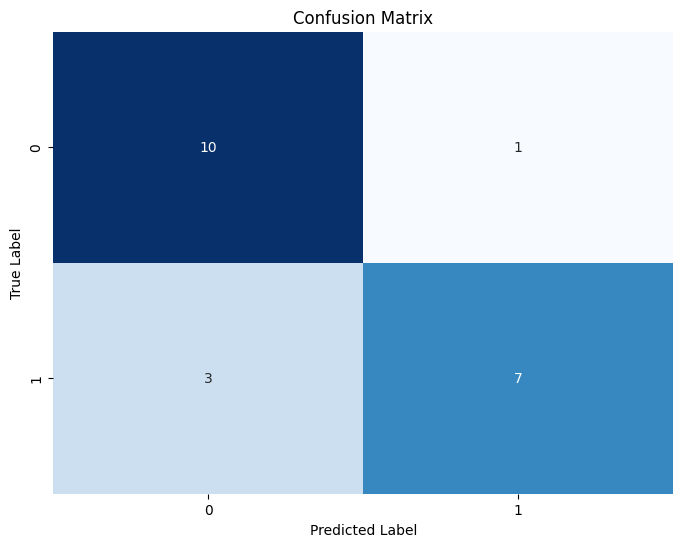

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Data Collection and Data Processing
# Loading the dataset to a pandas DataFrame
sonar_data = pd.read_csv('sonar data.csv', header=None)

# Display first few records and shape of the data
print(sonar_data.head())
print(sonar_data.shape)

# Overview of the dataset
print(sonar_data.describe())

# Class distribution
print(sonar_data[60].value_counts())

# Separating data and labels
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

# Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

# Model Training --> Support Vector Classifier
model = SVC()
model.fit(X_train, Y_train)

# Model Evaluation
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data: ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data: ', test_data_accuracy)

# Making a Predictive System
input_data = (0.0307, 0.0523, 0.0653, 0.0521, 0.0611, 0.0577, 0.0665, 
              0.0664, 0.1460, 0.2792, 0.3877, 0.4992, 0.4981, 0.4972, 
              0.5607, 0.7339, 0.8230, 0.9173, 0.9975, 0.9911, 0.8240, 
              0.6498, 0.5980, 0.4862, 0.3150, 0.1543, 0.0989, 0.0284, 
              0.1008, 0.2636, 0.2694, 0.2930, 0.2925, 0.3998, 0.3660, 
              0.3172, 0.4609, 0.4374, 0.1820, 0.3376, 0.6202, 0.4448, 
              0.1863, 0.1420, 0.0589, 0.0576, 0.0672, 0.0269, 0.0245, 
              0.0190, 0.0063, 0.0321, 0.0189, 0.0137, 0.0277, 0.0152, 
              0.0052, 0.0121, 0.0124, 0.0055)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Making prediction
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 'R'):
    print('The object is a Rock')
else:
    print('The object is a Mine')

# Confusion Matrix
# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the model to a file
with open('svc_model.pkl', 'wb') as file:
    pickle.dump(model, file)